In [1]:
import twint
import nest_asyncio
c = twint.Config()
c.Limit = 3000
c.Lang = 'en'
c.Pandas = True
c.Store_csv = True
c.Search = "Taliban OR Afghnaistan"
c.Replies = True
c.Verified = True
c.Since = '2021-08-01'
c.Until = '2021-10-02'
c.Popular_tweets = True
c.Pandas_clean = True
c.Min_replies = 1
c.Output = "afgo.csv"
nest_asyncio.apply()
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df

1444074812008194054 2021-10-02 04:30:39 +0530 <RepAdamSmith> When the Afghan government fell to the Taliban his family was trapped. His wife, a legal permanent resident and his children, who are US citizens, did not make it on the early evacuation flights.   Thankfully he reached out to my office and we were able to provide assistance. 2/4
1444066704171089922 2021-10-02 03:58:26 +0530 <anilaali> @TheInsiderPaper The decision to withdraw was done by a Republican president who was do “not woke.” He gave Taliban heads up- the corrupt #Afghan army lost morale &amp; Taliban got emboldened. @potus had the courage to take responsibility &amp; do what Americans &amp; Muslims wanted.
1444064056600637453 2021-10-02 03:47:55 +0530 <SashaIngber> Not sure why that tweet is gone. Here's an article about how Pakistan’s prime minister, Imran Khan, says his government is in peace talks with Pakistan's Taliban, TTP.  https://t.co/Yzr9nD0xa9
1444048590494633986 2021-10-02 02:46:27 +0530 <mSaleemJaved> @D

In [43]:
import pandas as pd
import time
import os
import csv
import datetime
from bs4 import BeautifulSoup
import numpy as np
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import spacy
from spacy.lang.en.examples import sentences
import nltk
from nltk.corpus import stopwords
all_stopwords = set(stopwords.words('english'))
df = pd.read_csv(r'C:\Users\usuma\Documents\Studies\Legitimacy Project\afgo.csv')
tokenizer = RegexpTokenizer('\w+|$[\d\.]+|http\S+http\S+|www.\S+co')
count=0
listt = []
for tw in df['tweet']:
    count = count+1
    tweetlist1 = tw
    tweetlist = tweetlist1.split()
    string_uncleaned = ' '.join(tweetlist)
    string_uncleaned = BeautifulSoup(string_uncleaned).get_text()
    string_emojiless = emoji.get_emoji_regexp().sub(u'',string_uncleaned)
    string_emojiless = re.sub(r"http\S+", "", string_emojiless)
    string_emojiless = re.sub(r"@\S+", "", string_emojiless)
    cleaned_output1 = string_emojiless
    listt.append(cleaned_output1)
df['clean']=listt
print(df.head(5))

<AxesSubplot:title={'center':'sentiment analysis'}>

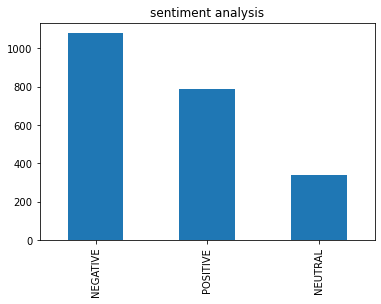

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
df['Sentiment_Compound'] = df.clean.apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Positive'] = df.clean.apply(lambda x: sia.polarity_scores(x)['pos'])
df['Sentiment_Negative'] = df.clean.apply(lambda x: sia.polarity_scores(x)['neg'])
df['Sentiment_Neutral'] = df.clean.apply(lambda x: sia.polarity_scores(x)['neu'])
df.to_csv(r'hopefullydone.csv')

df['Sentiment_Type_Vader']=''
df.loc[df.Sentiment_Compound>0,'Sentiment_Type_Vader']='POSITIVE'
df.loc[df.Sentiment_Compound==0,'Sentiment_Type_Vader']='NEUTRAL'
df.loc[df.Sentiment_Compound<0,'Sentiment_Type_Vader']='NEGATIVE'

df.Sentiment_Type_Vader.value_counts().plot(kind='bar',title="sentiment analysis")

<AxesSubplot:title={'center':'Sentiment Analysis'}>

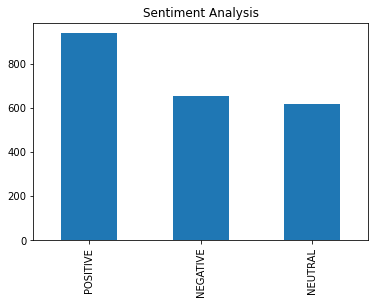

In [75]:
from nltk.sentiment.util import *
from textblob import TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

df['Polarity_TextBlob'] = df['clean'].apply(get_polarity)
df['Subjectivity_TextBlob'] = df['clean'].apply(get_subjectivity)
df['Sentiment_Type_TextBlob']=''

df.loc[df.Polarity_TextBlob>0,'Sentiment_Type_TextBlob']='POSITIVE'
df.loc[df.Polarity_TextBlob==0,'Sentiment_Type_TextBlob']='NEUTRAL'
df.loc[df.Polarity_TextBlob<0,'Sentiment_Type_TextBlob']='NEGATIVE'
df.Sentiment_Type_TextBlob.value_counts().plot(kind='bar',title="Sentiment Analysis")


<AxesSubplot:title={'center':'sentiment analysis with SOI1'}>

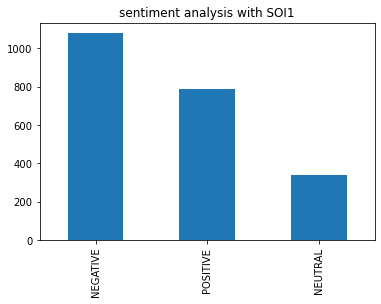

In [76]:
df['sphere_of_influence1'] = ((df['replies_count']+df['likes_count']+df['retweets_count'])/3)*df['Sentiment_Compound']
df['sphere_of_influence2'] = ((df['replies_count']*df['likes_count']*df['retweets_count'])/3)*df['Sentiment_Compound']

df['Sentiment_Type_Vader_soi1']=''
df.loc[df.sphere_of_influence1>0,'Sentiment_Type_Vader_soi1']='POSITIVE'
df.loc[df.sphere_of_influence1==0,'Sentiment_Type_Vader_soi1']='NEUTRAL'
df.loc[df.sphere_of_influence1<0,'Sentiment_Type_Vader_soi1']='NEGATIVE'

df.Sentiment_Type_Vader_soi1.value_counts().plot(kind='bar',title="sentiment analysis with SOI1")

<AxesSubplot:title={'center':'sentiment analysis with SOI2'}>

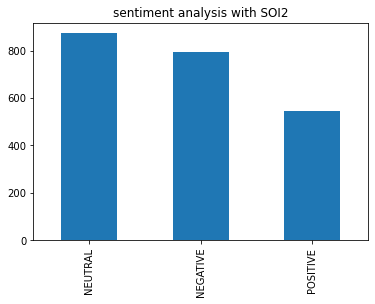

In [77]:
df['Sentiment_Type_Vader_soi2']=''
df.loc[df.sphere_of_influence2>0,'Sentiment_Type_Vader_soi2']='POSITIVE'
df.loc[df.sphere_of_influence2==0,'Sentiment_Type_Vader_soi2']='NEUTRAL'
df.loc[df.sphere_of_influence2<0,'Sentiment_Type_Vader_soi2']='NEGATIVE'

df.Sentiment_Type_Vader_soi2.value_counts().plot(kind='bar',title="sentiment analysis with SOI2")

In [84]:
df['Sentiment_Type_TextBlob']

0       POSITIVE
1       NEGATIVE
2       NEGATIVE
3       POSITIVE
4       POSITIVE
          ...   
2206     NEUTRAL
2207    NEGATIVE
2208    NEGATIVE
2209    POSITIVE
2210    POSITIVE
Name: Sentiment_Type_TextBlob, Length: 2211, dtype: object

<ipython-input-88-23d699dc87a4>:10: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(r'DONE!!!.xls')


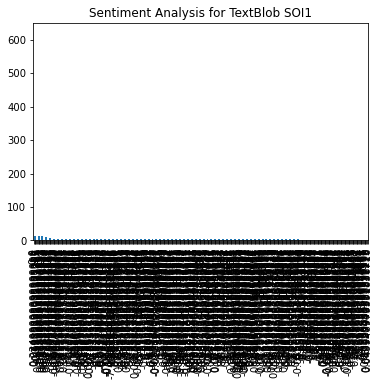

In [88]:
df['sphere_of_influence1_Blob']= ((df['replies_count']+df['likes_count']+df['retweets_count'])/3)*df['Polarity_TextBlob']*df['Subjectivity_TextBlob']
df['sphere_of_influence2_Blob'] = ((df['replies_count']*df['likes_count']*df['retweets_count'])/3)*df['Polarity_TextBlob']*df['Subjectivity_TextBlob']

df['Sentiment_Type_TextBlob_SOI1']=''
df.loc[df.sphere_of_influence1_Blob>0,'Sentiment_Type_TextBlob_SOI1']='POSITIVE'
df.loc[df.sphere_of_influence1_Blob==0,'Sentiment_Type_TextBlob_SOI1']='NEUTRAL'
df.loc[df.sphere_of_influence1_Blob<0,'Sentiment_Type_TextBlob_SOI1']='NEGATIVE'
df.sphere_of_influence1_Blob.value_counts().plot(kind='bar',title="Sentiment Analysis for TextBlob SOI1")
df['sphere_of_influence1_Blob']
df.to_excel(r'DONE!!!.xlsx')